These are the questions:

    1. What web pages have the most traffic? Least traffic?
    2. Which web pages have the most users? Least amount of users?
    3. Which web pages do users stay on the longest?
    4. Which web pages keep users browsing the most?
    5. What web pages have the most downloads? Least downloads?
    6. Which web pages do users exit the most frequently?

In [61]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

#load all the datasets

apw_all_domains_df = pd.read_csv('dataset-20220715-1102/all-participating-websites/apw-all-domains-30-days.csv')
apw_all_pages_df = pd.read_csv('dataset-20220715-1102/all-participating-websites/apw-all-pages-realtime.csv')
apw_browsers_df = pd.read_csv('dataset-20220715-1102/all-participating-websites/apw-browsers.csv')
apw_device_model_df = pd.read_csv('dataset-20220715-1102/all-participating-websites/apw-device_model.csv')
apw_devices_df = pd.read_csv('dataset-20220715-1102/all-participating-websites/apw-devices.csv')
apw_languages_df = pd.read_csv('dataset-20220715-1102/all-participating-websites/apw-language.csv')
apw_os_browsers_df = pd.read_csv('dataset-20220715-1102/all-participating-websites/apw-os-browsers.csv')
apw_os_df = pd.read_csv('dataset-20220715-1102/all-participating-websites/apw-os.csv')
apw_screen_size_df = pd.read_csv('dataset-20220715-1102/all-participating-websites/apw-screen-size.csv')
apw_top_downloads_df = pd.read_csv('dataset-20220715-1102/all-participating-websites/apw-top-downloads-yesterday.csv')
apw_top_exit_pages_df = pd.read_csv('dataset-20220715-1102/all-participating-websites/apw-top-exit-pages-30-days.csv')
apw_top_sources_df = pd.read_csv('dataset-20220715-1102/all-participating-websites/apw-top-traffic-sources-30-days.csv')
apw_windows_browsers_df = pd.read_csv('dataset-20220715-1102/all-participating-websites/apw-windows-browsers.csv')
apw_windows_ie_df = pd.read_csv('dataset-20220715-1102/all-participating-websites/apw-windows-ie.csv')

In [62]:
'''2. Which web pages have the most users? Least amount of users?'''

apw_all_pages_df.head(10)

,page,page_title,active_visitors
0,cdc.gov/coronavirus/2019-ncov/science/communit...,COVID-19 Community Levels | CDC,671
1,tools.usps.com/go/trackconfirmaction_input,USPS.com® - USPS Tracking® Results,343
2,secure.login.gov/,Welcome - Login.gov,321
3,ncbi.nlm.nih.gov/ncbi_pmc-frontend_pmc_article,NCBI pmc-frontend:pmc:article,267
4,covid.cdc.gov/covid-data-tracker/,CDC COVID Data Tracker,262
5,pubmed.ncbi.nlm.nih.gov/ncbi_pubmed_pubmed_abs...,NCBI pubmed:pubmed:abstract,215
6,tools.usps.com/go/trackconfirmaction,USPS.com® - USPS Tracking® Results,204
7,radar.weather.gov/,NWS Radar,170
8,covid.gov/tests,COVID.gov/tests - Free at-home COVID-19 tests,163
9,egov.uscis.gov/casestatus/mycasestatus.do,Case Status Online - Case Status,159


In [63]:
apw_all_pages_df.tail(20)#this seems interesting, why is the min 10?

,page,page_title,active_visitors
1318,uscis.gov/forms/filing-fees,Filing Fees | USCIS,10
1319,uscis.gov/green-card/green-card-processes-and-...,Affidavit of Support | USCIS,10
1320,uscis.gov/green-card/while-your-green-card-app...,While Your Green Card Application Is Pending w...,10
1321,uscis.gov/humanitarian/temporary-protected-status,Temporary Protected Status | USCIS,10
1322,uscis.gov/humanitarian/temporary-protected-sta...,Temporary Protected Status Designated Country:...,10
1323,uscis.gov/i-539,Application to Extend/Change Nonimmigrant Stat...,10
1324,uscis.gov/i-864p,2022 HHS Poverty Guidelines for Affidavit of S...,10
1325,uscis.gov/working-in-the-united-states/tempora...,H-2B Temporary Non-Agricultural Workers | USCIS,10
1326,usps.com/shop/money-orders.htm,Money Orders | USPS,10
1327,va.gov/disability/eligibility/hazardous-materi...,Camp Lejeune Water Contamination Health Issues...,10


In [21]:
apw_all_pages_df['active_visitors'].max()

671

In [38]:
apw_all_pages_df.shape

(1338, 3)

In [46]:
apw_all_pages_df.isnull().values.any()

False

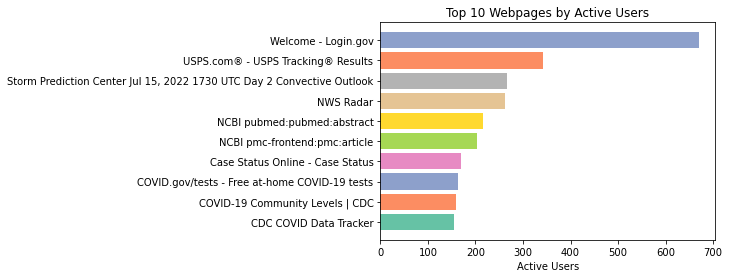

In [292]:
page = apw_all_pages_df['page'].head(10)
page_title = apw_all_pages_df['page_title'].head(10)
active_visitors = apw_all_pages_df['active_visitors'].head(10)

# Set Theme
theme = sns.color_palette("Set2")


# Figure Size
#fig = plt.figure(figsize =(10, 7))
 
# Horizontal Bar Plot
#sns.barplot(x = page_title, y = active_visitors, data = apw_all_pages_df , ci=None)

# Add Title
plt.title("Top 10 Webpages by Active Users")
plt.xlabel("Active Users")

# Rotate Labels
#plt.xticks(rotation = 90)

#why are these different?
#what is happening?
plt.barh(apw_all_pages_df['page_title'][:11].sort_values(), apw_all_pages_df['active_visitors'][:11].sort_values(), color = theme)
#plt.bar(page, active_visitors, color = theme)

plt.show()



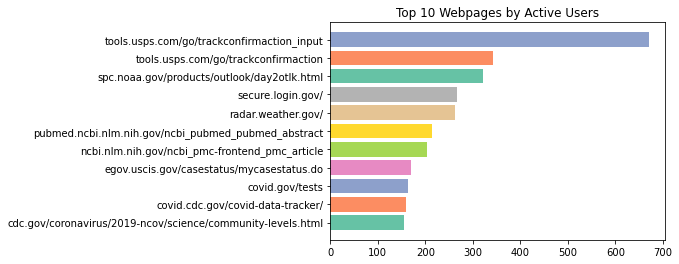

In [123]:
page = apw_all_pages_df['page'].head(10)
page_title = apw_all_pages_df['page_title'].head(10)
active_visitors = apw_all_pages_df['active_visitors'].head(10)

# Set Theme
theme = sns.color_palette("Set2")


# Figure Size
#fig = plt.figure(figsize =(10, 7))
 
# Horizontal Bar Plot
#sns.barplot(x = page_title, y = active_visitors, data = apw_all_pages_df , ci=None)

# Add Title
plt.title("Top 10 Webpages by Active Users")

# Rotate Labels
#plt.xticks(rotation = 90)

#why are these different?
#what is happening?
plt.barh(apw_all_pages_df['page'][:11].sort_values(), apw_all_pages_df['active_visitors'][:11].sort_values(), color = theme)
#plt.bar(page, active_visitors, color = theme)

plt.show()


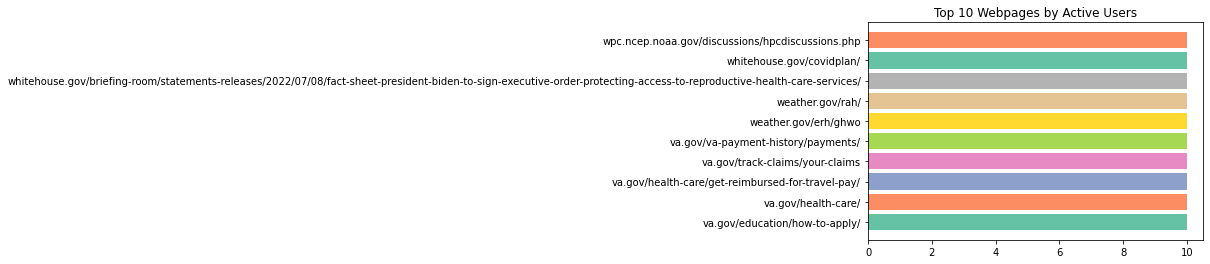

In [125]:
page = apw_all_pages_df['page'].head(10)
page_title = apw_all_pages_df['page_title'].head(10)
active_visitors = apw_all_pages_df['active_visitors'].head(10)

# Set Theme
theme = sns.color_palette("Set2")


# Figure Size
#fig = plt.figure(figsize =(10, 7))
 
# Horizontal Bar Plot
#sns.barplot(x = page_title, y = active_visitors, data = apw_all_pages_df , ci=None)

# Add Title
plt.title("Top 10 Webpages by Active Users")

# Rotate Labels
#plt.xticks(rotation = 90)

#why are these different?
#what is happening?
plt.barh(apw_all_pages_df['page'][-10:].sort_values(), apw_all_pages_df['active_visitors'][-10:].sort_values(), color = theme)
#plt.bar(page, active_visitors, color = theme)

plt.show()


In [7]:
'''5. What web pages have the most downloads? Least downloads?'''

apw_top_downloads_df.head()

,page_title,event_label,page,total_events
0,"About Form W-9, Request for Taxpayer Identific...",https://www.irs.gov/pub/irs-pdf/fw9.pdf,irs.gov/forms-pubs/about-form-w-9,15969
1,Renew my U.S. passport,https://eforms.state.gov/Forms/ds82.pdf,travel.state.gov/content/travel/en/passports/h...,10979
2,Employment Eligibility Verification | USCIS,https://www.uscis.gov/sites/default/files/docu...,uscis.gov/i-9,10744
3,Employment Eligibility Verification | USCIS,https://www.uscis.gov/sites/default/files/docu...,uscis.gov/i-9,10157
4,Passport Forms,https://eforms.state.gov/Forms/ds11.pdf,travel.state.gov/content/travel/en/passports/h...,9276


In [126]:
apw_top_downloads_df.tail(20)#this seems interesting, why is the min 10?

,page_title,event_label,page,total_events
80,Military Compensation > Pay > Basic Pay > Acti...,https://militarypay.defense.gov/Portals/3/Docu...,militarypay.defense.gov/pay/basic-pay/active-d...,1292
81,72052022R10010 - Procurement Supervisor | U.S....,https://www.usaid.gov/sites/default/files/docu...,usaid.gov/guatemala/careers/documents/72052022...,1233
82,Application for Asylum and for Withholding of ...,https://www.uscis.gov/sites/default/files/docu...,uscis.gov/i-589,1233
83,Children Under 16,https://eforms.state.gov/Forms/ds3053.PDF,travel.state.gov/content/travel/en/passports/n...,1233
84,Employment Eligibility Verification | USCIS,https://www.uscis.gov/sites/default/files/docu...,uscis.gov/i-9,1233
85,Fee Schedule | USCIS,https://www.uscis.gov/sites/default/files/docu...,uscis.gov/g-1055,1233
86,Petition for Alien Fiancé(e) | USCIS,https://www.uscis.gov/sites/default/files/docu...,uscis.gov/i-129f,1233
87,SDO | Solar Dynamics Observatory,https://sdo.gsfc.nasa.gov/assets/img/latest/la...,sdo.gsfc.nasa.gov/data/,1233
88,Visa Bulletin For July 2022,https://travel.state.gov/content/dam/visas/Bul...,travel.state.gov/content/travel/en/legal/visa-...,1233
89,"About Form 1040, U.S. Individual Income Tax Re...",https://www.irs.gov/pub/irs-pdf/f1040.pdf,irs.gov/forms-pubs/about-form-1040,1174


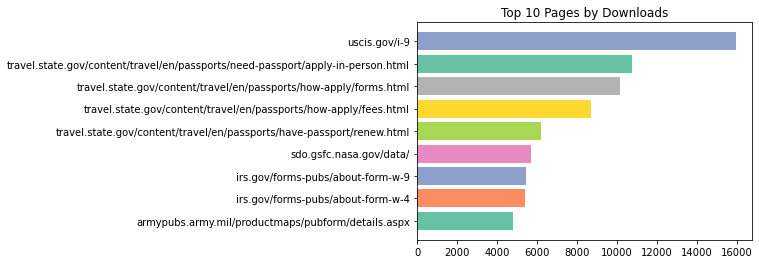

In [124]:
page_title = apw_top_downloads_df['page_title'].head(10)
event_label = apw_top_downloads_df['event_label'].head(10)
page = apw_top_downloads_df['page'].head(10)
total_events = apw_top_downloads_df['total_events'].head(10)

# Set Theme
theme = sns.color_palette("Set2")


# Figure Size
#fig = plt.figure(figsize =(10, 7))
 
# Horizontal Bar Plot
#sns.barplot(x = page_title, y = active_visitors, data = apw_all_pages_df , ci=None)

# Add Title
plt.title("Top 10 Pages by Downloads")

# Rotate Labels
#plt.xticks(rotation = 90)

#why are these different?
#what is happening?
plt.barh(apw_top_downloads_df['page'][:11].sort_values(), apw_top_downloads_df['total_events'][:11].sort_values(), color = theme)
#plt.bar(page, active_visitors, color = theme)

plt.show()

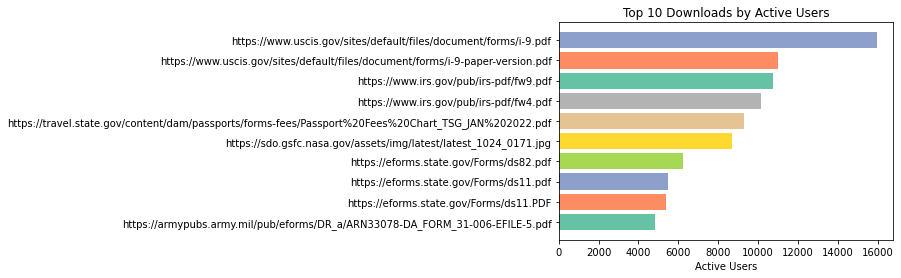

In [293]:
page_title = apw_top_downloads_df['page_title'].head(10)
event_label = apw_top_downloads_df['event_label'].head(10)
page = apw_top_downloads_df['page'].head(10)
total_events = apw_top_downloads_df['total_events'].head(10)

# Set Theme
theme = sns.color_palette("Set2")


# Figure Size
#fig = plt.figure(figsize =(10, 7))
 
# Horizontal Bar Plot
#sns.barplot(x = page_title, y = active_visitors, data = apw_all_pages_df , ci=None)

# Add Title

plt.title("Top 10 Downloads by Active Users")
plt.xlabel("Active Users")

# Rotate Labels
#plt.xticks(rotation = 90)

#why are these different?
#what is happening?
plt.barh(apw_top_downloads_df['event_label'][:11].sort_values(), apw_top_downloads_df['total_events'][:11].sort_values(), color = theme)
#plt.bar(page, active_visitors, color = theme)

plt.show()

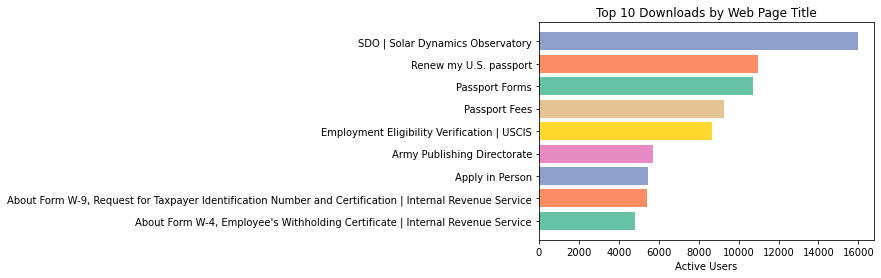

In [294]:
page_title = apw_top_downloads_df['page_title'].head(10)
event_label = apw_top_downloads_df['event_label'].head(10)
page = apw_top_downloads_df['page'].head(10)
total_events = apw_top_downloads_df['total_events'].head(10)

# Set Theme
theme = sns.color_palette("Set2")


# Figure Size
#fig = plt.figure(figsize =(10, 7))
 
# Horizontal Bar Plot
#sns.barplot(x = page_title, y = active_visitors, data = apw_all_pages_df , ci=None)

# Add Title
plt.title("Top 10 Downloads by Web Page Title")
plt.xlabel("Active Users")

# Rotate Labels
#plt.xticks(rotation = 90)

#why are these different?
#what is happening?
plt.barh(apw_top_downloads_df['page_title'][:11].sort_values(), apw_top_downloads_df['total_events'][:11].sort_values(), color = theme)
#plt.bar(page, active_visitors, color = theme)

plt.show()

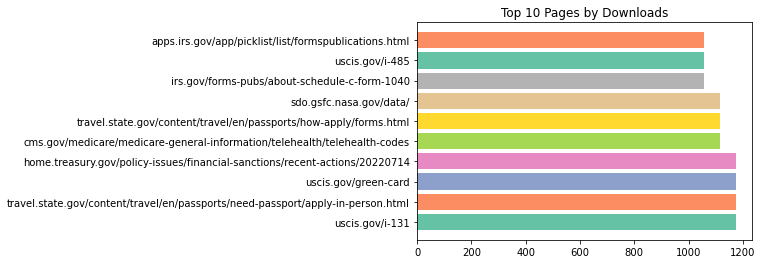

In [133]:
page_title = apw_top_downloads_df['page_title'].head(10)
event_label = apw_top_downloads_df['event_label'].head(10)
page = apw_top_downloads_df['page'].head(10)
total_events = apw_top_downloads_df['total_events'].head(10)

# Set Theme
theme = sns.color_palette("Set2")


# Figure Size
#fig = plt.figure(figsize =(10, 7))
 
# Horizontal Bar Plot
#sns.barplot(x = page_title, y = active_visitors, data = apw_all_pages_df , ci=None)

# Add Title
plt.title("Top 10 Pages by Downloads")

# Rotate Labels
#plt.xticks(rotation = 90)

#why are these different?
#what is happening?
plt.barh(apw_top_downloads_df['page'][-10:], apw_top_downloads_df['total_events'][-10:], color = theme)
#plt.bar(page, active_visitors, color = theme)

plt.show()

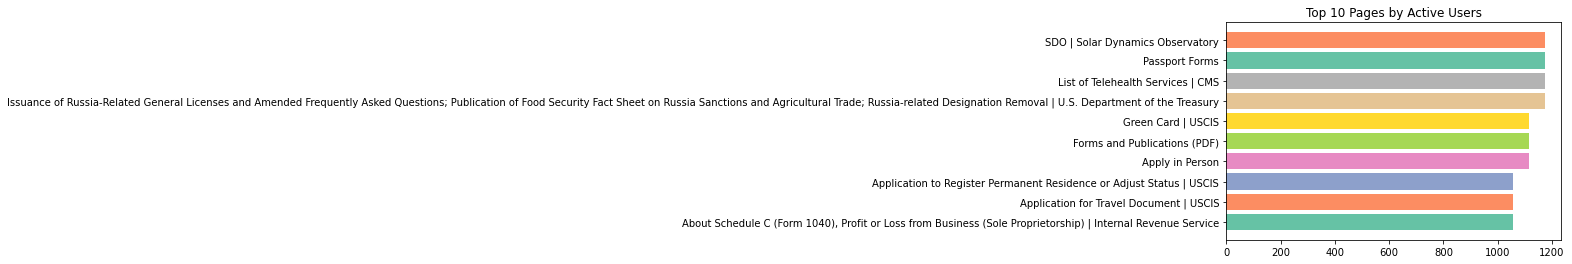

In [130]:
page_title = apw_top_downloads_df['page_title'].head(10)
event_label = apw_top_downloads_df['event_label'].head(10)
page = apw_top_downloads_df['page'].head(10)
total_events = apw_top_downloads_df['total_events'].head(10)

# Set Theme
theme = sns.color_palette("Set2")


# Figure Size
#fig = plt.figure(figsize =(10, 7))
 
# Horizontal Bar Plot
#sns.barplot(x = page_title, y = active_visitors, data = apw_all_pages_df , ci=None)

# Add Title
plt.title("Top 10 Pages by Active Users")

# Rotate Labels
#plt.xticks(rotation = 90)

#why are these different?
#what is happening?
plt.barh(apw_top_downloads_df['page_title'][-10:].sort_values(), apw_top_downloads_df['total_events'][-10:].sort_values(), color = theme)
#plt.bar(page, active_visitors, color = theme)

plt.show()

# Department of Health and Human Services, Commerce, and USPS

## From What Languages Are User Interacting With Webpages?

In [136]:
# 1. Loading in the data

# Department of Commerce

com_languages_df = pd.read_csv('dataset-20220715-1102/commerce/com-language.csv')

#Health and Human Services

hhs_languages_df = pd.read_csv('dataset-20220715-1102/health-human-services/hhs-language.csv')

# USPS

usps_languages_df = pd.read_csv('dataset-20220715-1102/postal-service/pos-language.csv')



## Department of Commerce

In [139]:
# Look at the data

com_languages_df.head()

,date,language,visits
0,2022-04-16,af,13
1,2022-04-16,ar,1022
2,2022-04-16,ar-ae,274
3,2022-04-16,ar-dz,12
4,2022-04-16,ar-eg,320


In [156]:
print(len(com_languages_df))
com_languages_df.shape 

#10,000 rows, 3 columns 

# Are the others this way? - yes

print(len(hhs_languages_df))
print(len(usps_languages_df))



10000
10000
10000


In [141]:
com_languages_df['language'].value_counts()

de-at    53
ca       53
en-cn    53
en-de    53
en       53
         ..
en-zm     1
bo-cn     1
fr-cd     1
en-pw     1
pt-mz     1
Name: language, Length: 318, dtype: int64

In [244]:
print(hhs_languages_df[hhs_languages_df['language'] == "(not set)"])
print(com_languages_df[com_languages_df['language'] == "(not set)"])
print(usps_languages_df[usps_languages_df['language'] == "(not set)"])

            date   language  visits
0     2022-04-16  (not set)    5668
427   2022-04-17  (not set)    6112
865   2022-04-18  (not set)    7675
1336  2022-04-19  (not set)    8493
1813  2022-04-20  (not set)   10818
2301  2022-04-21  (not set)   10286
2771  2022-04-22  (not set)    9521
3231  2022-04-23  (not set)    6995
3670  2022-04-24  (not set)    7945
4117  2022-04-25  (not set)   10505
4598  2022-04-26  (not set)   11343
5074  2022-04-27  (not set)   10398
5563  2022-04-28  (not set)   10206
6045  2022-04-29  (not set)    7895
6502  2022-04-30  (not set)    5869
6927  2022-05-01  (not set)    6099
7357  2022-05-02  (not set)    8257
7812  2022-05-03  (not set)    8930
8274  2022-05-04  (not set)    8629
8756  2022-05-05  (not set)    9205
9219  2022-05-06  (not set)    8140
9685  2022-05-07  (not set)    6191
            date   language  visits
538   2022-04-19  (not set)      15
729   2022-04-20  (not set)      54
3529  2022-05-05  (not set)      15
6027  2022-05-18  (not set) 

In [145]:
com_languages_df['date'].values

array(['2022-04-16', '2022-04-16', '2022-04-16', ..., '2022-06-07',
       '2022-06-07', '2022-06-07'], dtype=object)

In [158]:
print(com_languages_df['date'].nunique())

#45 distinct dates... this seems odd?

#Does this happen to the others?

print(hhs_languages_df['date'].nunique()) # only 22 disticnt dates
print(usps_languages_df['date'].nunique())# only 49 distinct dates

#what dates do they all have in common? can we do the last 10 days? 

53
22
49


In [164]:
min = com_languages_df['date'].min()
max = com_languages_df['date'].max()

print(min)
print(max)

print(pd.to_datetime(max) - pd.to_datetime(min))

com_languages_df['date'].unique()

2022-04-16
2022-06-07
52 days 00:00:00


array(['2022-04-16', '2022-04-17', '2022-04-18', '2022-04-19',
       '2022-04-20', '2022-04-21', '2022-04-22', '2022-04-23',
       '2022-04-24', '2022-04-25', '2022-04-26', '2022-04-27',
       '2022-04-28', '2022-04-29', '2022-04-30', '2022-05-01',
       '2022-05-02', '2022-05-03', '2022-05-04', '2022-05-05',
       '2022-05-06', '2022-05-07', '2022-05-08', '2022-05-09',
       '2022-05-10', '2022-05-11', '2022-05-12', '2022-05-13',
       '2022-05-14', '2022-05-15', '2022-05-16', '2022-05-17',
       '2022-05-18', '2022-05-19', '2022-05-20', '2022-05-21',
       '2022-05-22', '2022-05-23', '2022-05-24', '2022-05-25',
       '2022-05-26', '2022-05-27', '2022-05-28', '2022-05-29',
       '2022-05-30', '2022-05-31', '2022-06-01', '2022-06-02',
       '2022-06-03', '2022-06-04', '2022-06-05', '2022-06-06',
       '2022-06-07'], dtype=object)

In [163]:
min = hhs_languages_df['date'].min()
max = hhs_languages_df['date'].max()

print(min)
print(max)

print(pd.to_datetime(max) - pd.to_datetime(min))

#checking to make sure there arent any missing int he middle
hhs_languages_df['date'].unique()

2022-04-16
2022-05-07


array(['2022-04-16', '2022-04-17', '2022-04-18', '2022-04-19',
       '2022-04-20', '2022-04-21', '2022-04-22', '2022-04-23',
       '2022-04-24', '2022-04-25', '2022-04-26', '2022-04-27',
       '2022-04-28', '2022-04-29', '2022-04-30', '2022-05-01',
       '2022-05-02', '2022-05-03', '2022-05-04', '2022-05-05',
       '2022-05-06', '2022-05-07'], dtype=object)

In [165]:
min = usps_languages_df['date'].min()
max = usps_languages_df['date'].max()

print(min)
print(max)

print(pd.to_datetime(max) - pd.to_datetime(min))

usps_languages_df['date'].unique()

2022-04-16
2022-06-03
48 days 00:00:00


array(['2022-04-16', '2022-04-17', '2022-04-18', '2022-04-19',
       '2022-04-20', '2022-04-21', '2022-04-22', '2022-04-23',
       '2022-04-24', '2022-04-25', '2022-04-26', '2022-04-27',
       '2022-04-28', '2022-04-29', '2022-04-30', '2022-05-01',
       '2022-05-02', '2022-05-03', '2022-05-04', '2022-05-05',
       '2022-05-06', '2022-05-07', '2022-05-08', '2022-05-09',
       '2022-05-10', '2022-05-11', '2022-05-12', '2022-05-13',
       '2022-05-14', '2022-05-15', '2022-05-16', '2022-05-17',
       '2022-05-18', '2022-05-19', '2022-05-20', '2022-05-21',
       '2022-05-22', '2022-05-23', '2022-05-24', '2022-05-25',
       '2022-05-26', '2022-05-27', '2022-05-28', '2022-05-29',
       '2022-05-30', '2022-05-31', '2022-06-01', '2022-06-02',
       '2022-06-03'], dtype=object)

In [252]:
# I think we should filter to the dates 04-16-2022 - 05-05-2022 since these are the dates all datasets have in common

com = com_languages_df[com_languages_df['date'] <= '2022-05-05']

hhs = hhs_languages_df[hhs_languages_df['date'] <= '2022-05-05']

usps = usps_languages_df[usps_languages_df['date'] <= '2022-05-05']


In [174]:
#sanity check

min = com['date'].min()
max = com['date'].max()

print(min)
print(max)

2022-04-16
2022-05-05


In [175]:
min = hhs['date'].min()
max = hhs['date'].max()

print(min)
print(max)

2022-04-16
2022-05-05


In [176]:
min = usps['date'].min()
max = usps['date'].max()

print(min)
print(max)

2022-04-16
2022-05-05


In [177]:
com.shape

(3724, 3)

In [178]:
hhs.shape

(9219, 3)

In [179]:
usps.shape

(4149, 3)

In [ ]:
# The languages dataset must cutoff after 10,000 rows.

In [180]:
com.head()

,date,language,visits
0,2022-04-16,af,13
1,2022-04-16,ar,1022
2,2022-04-16,ar-ae,274
3,2022-04-16,ar-dz,12
4,2022-04-16,ar-eg,320


In [181]:
com['language'].unique() #all languages seem fine to me

array(['af', 'ar', 'ar-ae', 'ar-dz', 'ar-eg', 'ar-iq', 'ar-jo', 'ar-sa',
       'ar-sy', 'ar-ye', 'az-az', 'bg', 'bg-bg', 'bs-ba', 'c', 'ca',
       'ca-es', 'cs', 'cs-cz', 'da', 'da-dk', 'de', 'de-at', 'de-ch',
       'de-de', 'el', 'el-gr', 'en', 'en-150', 'en-ae', 'en-as', 'en-au',
       'en-bw', 'en-ca', 'en-cn', 'en-co', 'en-de', 'en-eg', 'en-gb',
       'en-gb-oxendict', 'en-hk', 'en-hr', 'en-ie', 'en-in', 'en-ir',
       'en-jm', 'en-jo', 'en-ke', 'en-mx', 'en-my', 'en-ng', 'en-nl',
       'en-nz', 'en-ph', 'en-pk', 'en-pr', 'en-ru', 'en-sa', 'en-se',
       'en-sg', 'en-us', 'en-us@posix', 'en-vi', 'en-za', 'en-zg',
       'en-zw', 'es', 'es-419', 'es-ar', 'es-bo', 'es-cl', 'es-co',
       'es-cr', 'es-cu', 'es-do', 'es-ec', 'es-es', 'es-gt', 'es-hn',
       'es-mx', 'es-pa', 'es-pe', 'es-pr', 'es-sv', 'es-us', 'es-uy',
       'es-ve', 'es-xl', 'et', 'et-ee', 'fa', 'fa-ir', 'fi', 'fi-fi',
       'fil', 'fil-ph', 'fr', 'fr-be', 'fr-ca', 'fr-ch', 'fr-dz', 'fr-fr',
       'fr-ma'

In [ ]:
# What are the top 10 languages used within each department?

In [209]:
com.sort_values('visits', ascending = False).head(10) # by date

,date,language,visits
3022,2022-05-02,en-us,4468650
3212,2022-05-03,en-us,4257253
418,2022-04-18,en-us,4256579
3404,2022-05-04,en-us,4211243
3601,2022-05-05,en-us,4179719
608,2022-04-19,en-us,4061547
2477,2022-04-29,en-us,4045553
984,2022-04-21,en-us,4045142
795,2022-04-20,en-us,4004556
1174,2022-04-22,en-us,3984835


In [194]:
hhs.sort_values('visits', ascending = False).head(10) # by date

,date,language,visits
1533,2022-04-19,en-us,11585642
4791,2022-04-26,en-us,11511492
5283,2022-04-27,en-us,11401869
4315,2022-04-25,en-us,11348963
2017,2022-04-20,en-us,11314581
1062,2022-04-18,en-us,11063287
8473,2022-05-04,en-us,11000913
5766,2022-04-28,en-us,10880534
2500,2022-04-21,en-us,10873113
8002,2022-05-03,en-us,10795451


In [195]:
usps.sort_values('visits', ascending = False).head(10) # by date

,date,language,visits
3788,2022-05-04,en-us,14188906
4004,2022-05-05,en-us,14100790
3365,2022-05-02,en-us,14019682
436,2022-04-18,en-us,13925785
2347,2022-04-27,en-us,13626479
2562,2022-04-28,en-us,13584378
1902,2022-04-25,en-us,13528372
888,2022-04-20,en-us,13518157
3573,2022-05-03,en-us,13498116
1106,2022-04-21,en-us,13429657


In [219]:
# what if we group by languages?

##ID row departments and concat them

# TOP TOTAL VISITS IN DURING THE SPECIFIED TIME RANGE

com_gb_lang = com.groupby(['language']).sum().sort_values('visits', ascending = False).head(10)
com_gb_lang['% to Total Vsits'] = com_gb_lang['visits'].div(com_gb_lang['visits'].sum())
com_gb_lang = com_gb_lang.reset_index()
com_gb_lang

#com_gb_lang['visits'].sum() 
#80950283

,language,visits,% to Total Vsits
0,en-us,75961163,0.938368
1,en-gb,1731982,0.021396
2,en,1044212,0.012899
3,zh-cn,599172,0.007402
4,en-ca,474822,0.005866
5,es-es,292169,0.003609
6,en-au,250447,0.003094
7,es-419,219342,0.002710
8,es-us,196557,0.002428
9,ja,180417,0.002229


In [274]:
hhs_gb_lang = hhs.groupby(['language']).sum().sort_values('visits', ascending = False).head(10)
hhs_gb_lang['% to Total Vsits'] = hhs_gb_lang['visits'].div(hhs_gb_lang['visits'].sum())
hhs_gb_lang = hhs_gb_lang.reset_index()
hhs_gb_lang

,language,visits,% to Total Vsits
0,en-us,192271851,0.657037
1,en-gb,33003416,0.112780
2,zh-cn,14841769,0.050718
3,es-419,14007053,0.047865
4,es-es,12960096,0.044288
5,es-us,8616962,0.029446
6,en-ca,5679592,0.019408
7,en-au,3928918,0.013426
8,es-mx,3771923,0.012890
9,en-in,3553372,0.012143


In [230]:
usps_gb_lang = usps.groupby(['language']).sum().sort_values('visits', ascending = False).head(10)
usps_gb_lang['% to Total Vsits'] = usps_gb_lang['visits'].div(usps_gb_lang['visits'].sum())
usps_gb_lang = usps_gb_lang.reset_index()
usps_gb_lang

,language,visits,% to Total Vsits
0,en-us,236504314,0.956376
1,es-us,2420337,0.009787
2,en-gb,2239705,0.009057
3,en-ca,1662882,0.006724
4,en,1413781,0.005717
5,es-419,995801,0.004027
6,zh-cn,771927,0.003122
7,en-au,641321,0.002593
8,es-es,368444,0.001490
9,de-de,273647,0.001107


In [273]:
# We could look at the most popular languages, and see if it changes by dates?

hhs.head(10)



,date,language,visits
1,2022-04-16,af,168
2,2022-04-16,af-za,35
3,2022-04-16,am,89
4,2022-04-16,am-et,17
5,2022-04-16,ar,41336
6,2022-04-16,ar-ae,7261
7,2022-04-16,ar-ar,26
8,2022-04-16,ar-bh,30
9,2022-04-16,ar-dz,149
10,2022-04-16,ar-eg,10571


In [255]:
hhs.drop(hhs[hhs['language'] == "(not set)"].index, inplace = True)
com.drop(com[com['language'] == "(not set)"].index, inplace = True)
usps.drop(usps[usps['language'] == "(not set)"].index, inplace = True)

/var/folders/2q/m69lcbgx44db70sn2zr0s69c0000gn/T/ipykernel_11786/2612969336.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hhs.drop(hhs[hhs['language'] == "(not set)"].index, inplace = True)
/var/folders/2q/m69lcbgx44db70sn2zr0s69c0000gn/T/ipykernel_11786/2612969336.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  com.drop(com[com['language'] == "(not set)"].index, inplace = True)
/var/folders/2q/m69lcbgx44db70sn2zr0s69c0000gn/T/ipykernel_11786/2612969336.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.

In [286]:
# We could look at the most popular languages, and see if it changes by dates?

hhs_en_us = hhs[hhs['language'] == 'en-us']
hhs_gb_date = hhs_en_us.groupby(['date']).sum().sort_values('visits', ascending = False).head(10)
hhs_gb_date = hhs_gb_date.reset_index()
hhs_gb_date.sort_values('date')

,date,visits
5,2022-04-18,11063287
0,2022-04-19,11585642
4,2022-04-20,11314581
8,2022-04-21,10873113
3,2022-04-25,11348963
1,2022-04-26,11511492
2,2022-04-27,11401869
7,2022-04-28,10880534
9,2022-05-03,10795451
6,2022-05-04,11000913


In [287]:
hhs_en_gb_gb = hhs[hhs['language'] == 'en-gb']

hhs_gb_date_engb = hhs_en_gb_gb.groupby(['date']).sum().sort_values('visits', ascending = False).head(10)
hhs_gb_date_engb = hhs_gb_date_engb.reset_index()
hhs_gb_date_engb.sort_values('date')

,date,visits
3,2022-04-19,1857513
6,2022-04-20,1845269
8,2022-04-21,1807432
1,2022-04-25,1923275
0,2022-04-26,1936364
2,2022-04-27,1900870
4,2022-04-28,1849934
9,2022-05-03,1775912
5,2022-05-04,1848050
7,2022-05-05,1822182


In [266]:
hhs_gb_date = hhs.groupby(['date']).sum().sort_values('visits', ascending = False).head(10)
hhs_gb_date = hhs_gb_date.reset_index()
hhs_gb_date.sort_values('date')

,date,visits
8,2022-04-18,18583600
1,2022-04-19,19856457
4,2022-04-20,19530708
6,2022-04-21,18858085
2,2022-04-25,19725539
0,2022-04-26,19988526
3,2022-04-27,19688443
7,2022-04-28,18819333
5,2022-05-04,18873474
9,2022-05-05,18491556


In [270]:
com_gb_date = com.groupby(['date']).sum().sort_values('visits', ascending = False).head(10)
com_gb_date = com_gb_date.reset_index()
com_gb_date.sort_values('date')

,date,visits
1,2022-04-18,4634764
5,2022-04-19,4465897
7,2022-04-20,4400088
6,2022-04-21,4442504
9,2022-04-22,4341683
8,2022-04-29,4386528
0,2022-05-02,4819445
2,2022-05-03,4614941
3,2022-05-04,4579274
4,2022-05-05,4556891


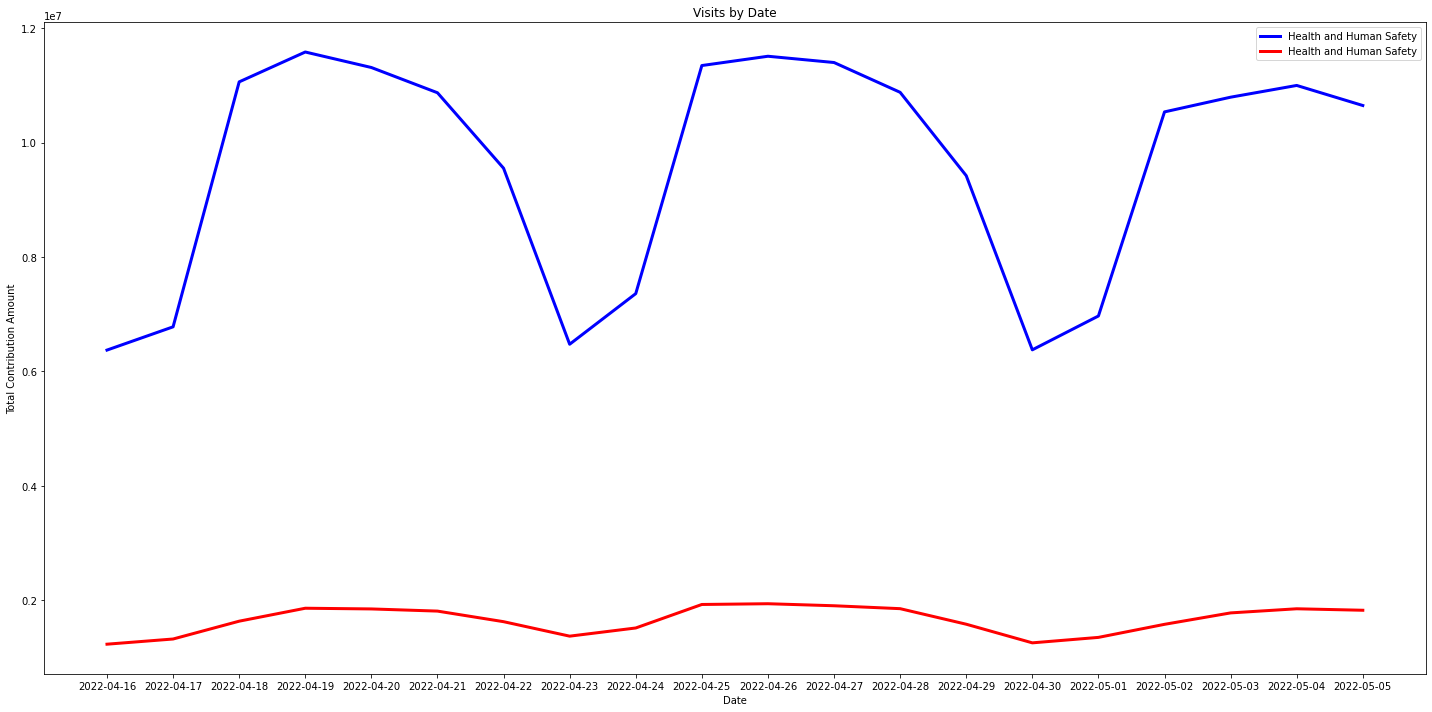

In [291]:
import datetime as dt

#start plot
fig = plt.figure(figsize=(20, 10))

# Plot time series


plt.plot(hhs_en_us.date, hhs_en_us.visits, color = 'blue',
         label='Health and Human Safety', 
         linewidth=3)

plt.plot(hhs_en_gb_gb.date, hhs_en_gb_gb.visits, color = 'red',
         label='Health and Human Safety', 
         linewidth=3)

#plt.axvline(dt.datetime(2016, 1, 17), color = 'black', label = 'Primary Debate 1')
#plt.axvline(dt.datetime(2016, 2, 11), color = 'black', label = 'Primary Debate 2')
#plt.axvline(dt.datetime(2016, 3, 9), color = 'black', label = 'Primary Debate 3')



# Add title and labels

plt.title('Visits by Date')
plt.xlabel('Date')
plt.ylabel('Total Contribution Amount')

# Add legend

plt.legend()

# Auto space

plt.tight_layout()

# Display plot

plt.show()

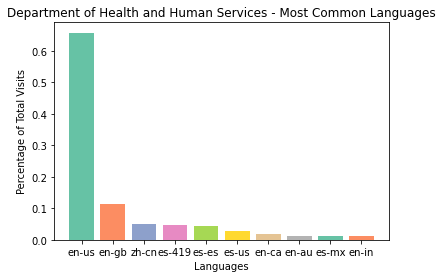

In [295]:
# Set Theme
theme = sns.color_palette("Set2")


# Figure Size
#fig = plt.figure(figsize =(10, 7))
 
# Horizontal Bar Plot
#sns.barplot(x = page_title, y = active_visitors, data = apw_all_pages_df , ci=None)

# Add Title
plt.title("Department of Health and Human Services - Most Common Languages")
plt.ylabel("Percentage of Total Visits")
plt.xlabel("Languages")

# Rotate Labels
#plt.xticks(rotation = 90)

#why are these different?
#what is happening?
plt.bar(hhs_gb_lang['language'], hhs_gb_lang['% to Total Vsits'], color = theme)
#plt.bar(page, active_visitors, color = theme)

plt.show()

In [ ]:
plt.plot(com_gb_date.date, com_gb_date.visits, color = 'blue',
         label='Depertment of Commerce', 
         linewidth=3)


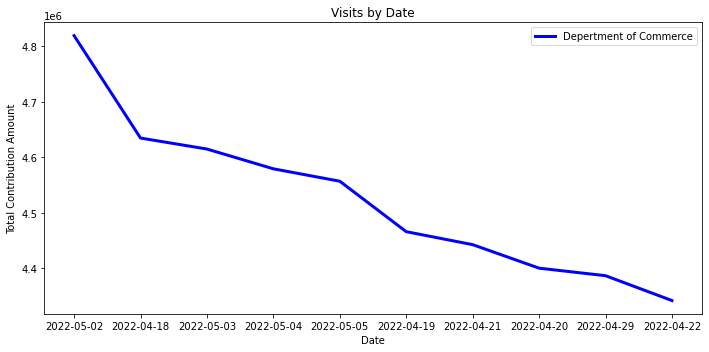

In [272]:
import datetime as dt

#start plot
fig = plt.figure(figsize=(10, 5))

# Plot time series

plt.plot(com_gb_date.date, com_gb_date.visits, color = 'blue',
         label='Depertment of Commerce', 
         linewidth=3)


#plt.axvline(dt.datetime(2016, 1, 17), color = 'black', label = 'Primary Debate 1')
#plt.axvline(dt.datetime(2016, 2, 11), color = 'black', label = 'Primary Debate 2')
#plt.axvline(dt.datetime(2016, 3, 9), color = 'black', label = 'Primary Debate 3')



# Add title and labels

plt.title('Visits by Date')
plt.xlabel('Date')
plt.ylabel('Total Contribution Amount')

# Add legend

plt.legend()

# Auto space

plt.tight_layout()

# Display plot

plt.show()

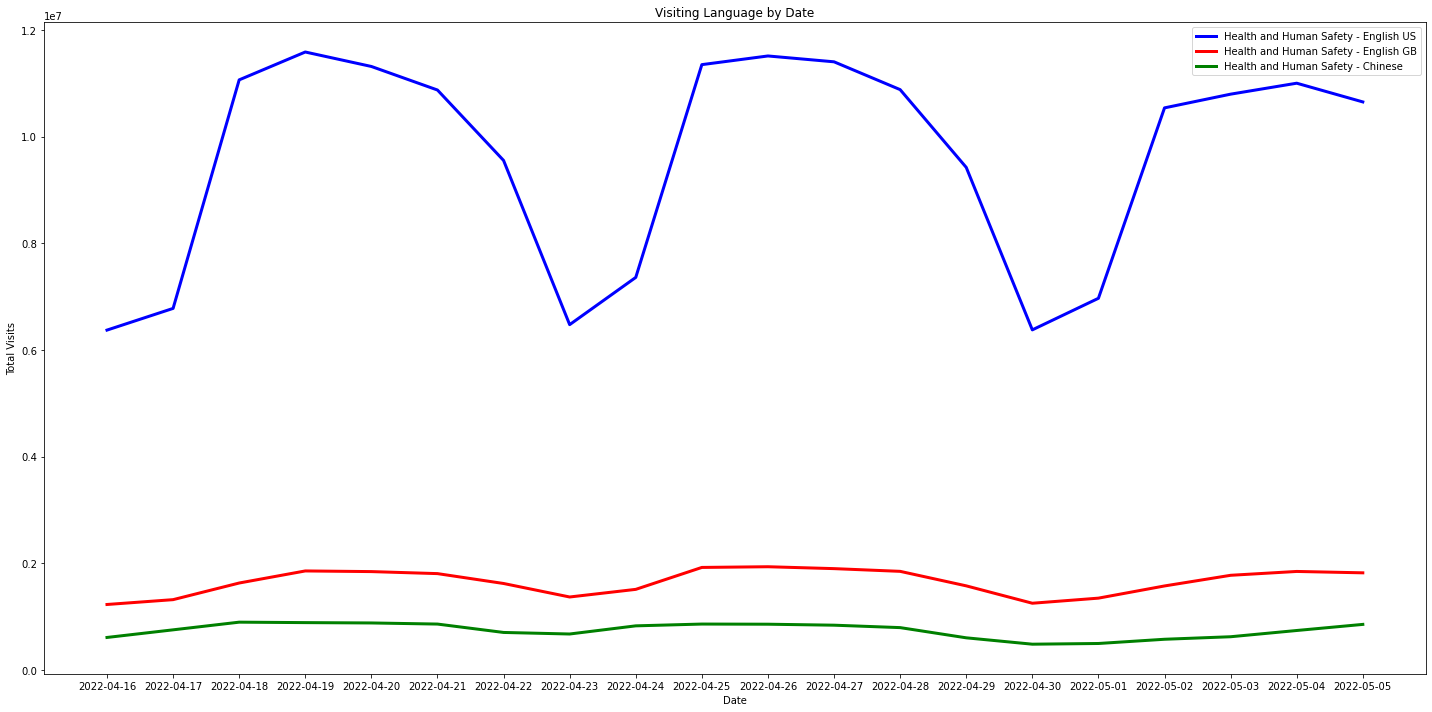

In [297]:
import datetime as dt

hhs_en_us = hhs[hhs['language'] == 'en-us']
hhs_zh_cn = hhs[hhs['language'] == 'zh-cn']
hhs_en_gb = hhs[hhs['language'] == 'en-gb']


#start plot
fig = plt.figure(figsize=(20, 10))

# Plot time series

plt.plot(hhs_en_us.date, hhs_en_us.visits, color = 'blue',
         label='Health and Human Safety - English US', 
        linewidth=3)
plt.plot(hhs_en_gb.date, hhs_en_gb.visits, color = 'red',
         label='Health and Human Safety - English GB', 
         linewidth=3)
plt.plot(hhs_zh_cn.date, hhs_zh_cn.visits, color = 'green',
         label='Health and Human Safety - Chinese', 
         linewidth=3)


#plt.axvline(dt.datetime(2016, 1, 17), color = 'black', label = 'Primary Debate 1')
#plt.axvline(dt.datetime(2016, 2, 11), color = 'black', label = 'Primary Debate 2')
#plt.axvline(dt.datetime(2016, 3, 9), color = 'black', label = 'Primary Debate 3')



# Add title and labels

plt.title('Visiting Language by Date')
plt.xlabel('Date')
plt.ylabel('Total Visits')

# Add legend

plt.legend()

# Auto space

plt.tight_layout()

# Display plot

plt.show()